# How to make data ready for Deep Learning Algorithms?

This is a big challenge!!! I want to generalize the read and pre-process step for any use case.

This depends on :
- the type of the data that is processed. Is it a text, an image or just a structured data
- the model that is going to consume the data for training. Is it an NN, a CNN, an RNN?
- the nature of the messy data. How messy the data is? dirty data!!!!

Let's go from the hypothese that data is like the one that found in Kaggle platform. So just normal data, that are very influenced by its type.

But Why I am trying to do that?
Because I find it hard and hate wasting time just find the way to read data and make it ready.


Let's start with image data and text data, and audio data to finish with structured data.


Do not forget that the target reader is keras or tensorflow!!!


## Image Data Reading and Preprocessing

Let's go from what exist !!!
- Keras data processing and 
- tensorflow data processing


### Here the way keras read data 
Keras dataset preprocessing utilities, located at `tf.keras.preprocessing`, help you go from raw data on disk to a `tf.data.Dataset` object that can be used to train a model.

Here's a quick example: let's say you have 10 folders, each containing 10,000 images from a different category, and you want to train a classifier that maps an image to its category. Your training data folder would look like this:

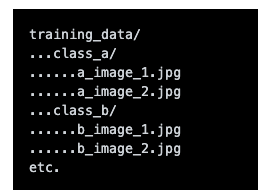


You may also have a validation data folder validation_data/ structured in the same way.

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory='training_data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

validation_ds = image_dataset_from_directory(
    directory='validation_data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

model = keras.applications.Xception(weights=None, input_shape=(256, 256, 3), classes=10)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(train_ds, epochs=10, validation_data=validation_ds)

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

def imgReadSubDir(dirList, batch_size=batch_size, image_size=image_size):
    """
    argument 
      - dirList: list of subdirectories
      - batch_size
      - image_size
    return 
      - tf datasets: training, validation and/or test data, depending on the list

    """
    for d in disrList:
        return image_dataset_from_directory(directory=d,
                                            labels='inferred',
                                            label_mode='categorical',
                                            batch_size=batch_size,
                                            image_size=image_size)
    



### image_dataset_from_directory function
Generates a `tf.data.Dataset` from image files in a directory

Then calling `image_dataset_from_directory(main_directory, labels='inferred')` will return a `tf.data.Dataset` that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

## load_img function
It loads image into PIL format

In [ ]:
tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

## img_to_array function
convert a PIL image to an array

In [ ]:
img_to_array function
tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
Converts a PIL Image instance to a Numpy array.

In [ ]:
# usage
from PIL import Image

img_data = np.random.random(size=(100, 100, 3))

img = tf.keras.preprocessing.image.array_to_img(img_data)

array = tf.keras.preprocessing.image.img_to_array(img)

ref : https://keras.io/api/preprocessing/image/

# Conclusion

If your aim is to creatz tensorflow datasets you have subdivide your data into train/valid or test set and then subdivide them again with respect to the number of classes you want to use in the model.


I could create function above it that return a tensor dataset ready to be pushed in models.

# Timeseries data preprocessing

**timeseries_dataset_from_array** function


Creates a dataset of sliding windows over a timeseries provided as array.

This function takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of timeseries inputs and targets.



It returns a `tf.data.Dataset` instance. If targets was passed, the dataset yields tuple `(batch_of_sequences, batch_of_targets)`. If not, the dataset yields only `batch_of_sequences`.

In [5]:
import numpy as np
#np.ra

In [12]:
data=np.random.randn(110,1)

In [18]:
data[:-10].shape

(100, 1)

## Example 2: Temporal regression

In [19]:
input_data = data[:-10]
targets = data[10:]

dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    input_data, targets, sequence_length=10)


In [20]:
for batch in dataset:
    inputs, targets = batch
    assert np.array_equal(inputs[0], data[:10])  # First sequence: steps [0-9]
    assert np.array_equal(targets[0], data[10])  # Corresponding target: step 10
    break

In [26]:
len(next(iter(dataset)))

2

In [25]:
inputs.shape, targets.shape

(TensorShape([91, 10, 1]), TensorShape([91, 1]))

## Example 3: Temporal regression for many-to-many architectures.

Consider two arrays of scalar values X and Y, both of shape (100,). The resulting dataset should consist samples with 20 timestamps each. The samples should not overlap. To generate a dataset that uses the current timestamp to predict the corresponding target timestep, you would use:

In [27]:

X = np.arange(100)
Y = X*2

sample_length = 20
input_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
  X, None, sequence_length=sample_length, sequence_stride=sample_length)
target_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
  Y, None, sequence_length=sample_length, sequence_stride=sample_length)

for batch in zip(input_dataset, target_dataset):
    inputs, targets = batch
    assert np.array_equal(inputs[0], X[:sample_length])
  
    # second sample equals output timestamps 20-40
    assert np.array_equal(targets[1], Y[sample_length:2*sample_length])
    break

*the question is how we choose the sample_length*

It is like we are using a 20 sample time step to compute one output, the prediction.
But what if we have many different time step? We have to create as many colimns as we need???


In [29]:
inputs.shape

TensorShape([5, 20])

### Pads sequences to the same length.

This function transforms a list (of length num_samples) of sequences `(lists of integers)` into a 2D Numpy array of shape `(num_samples, num_timesteps)`. num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.

- `Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps long`.

-  Sequences longer than num_timesteps are truncated so that they fit the desired length.

The position where padding or truncation happens is determined by the arguments padding and truncating, respectively. Pre-padding or removing values from the beginning of the sequence is the default.

In [ ]:
# pad_sequences function
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)

In [31]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [32]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, value=-1)

array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]], dtype=int32)

In [33]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [34]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=2)

array([[0, 1],
       [2, 3],
       [5, 6]], dtype=int32)

ref : https://keras.io/api/preprocessing/timeseries/

# Text data preprocessing
text_dataset_from_directory function

Then calling text_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of texts from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

Only .txt files are supported at this time

In [ ]:
tf.keras.preprocessing.text_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    batch_size=32,
    max_length=None,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    follow_links=False,
)

Like keras image reader from directory we can read text too

# Read and Process RAW Image and make it KerABLE

what if keras read from directory could do it?

Let's see!


In [ ]:
tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

In [35]:
!pwd

/Users/kindi/Documents/PROG/AI_LABS


In [ ]:
import os
def getFileNamesList(formatta, imagePath):
    """
    argument: choose among '.jpeg', '.png', '.gif'
    return: list of files in a directory
    """
    path = imagePath

    folder = os.fsencode(path)
    
    filenames = []
    
    for file in os.listdir(folder):
        filename = os.fsdecode(file)
        if filename.endswith( (formatta) ): 
            filenames.append(filename)
    return filenames


def readImageFromDirectory(target_size, fileNameList, nb_channel ):
    """
    target_size: the 1D shape of the image to output
    fileNameList: file gotten from the directory
    nb_channel: number of channel of the input image
    
    return: 4D shape numpy array
    
    
    """
    m=len(fileNameList)
    
    ND=np.arange(m*target_size[0]*target_size[1]*nb_channel).reshape(m, target_size[0],target_size[1],nb_channel)
    
    for im in range(ND.shape[0]):
        
        img=tf.keras.preprocessing.image.load_img(
            imagePath+str(fileNameList[im]), grayscale=False, color_mode="rgb", target_size=target_size,
            interpolation="nearest")
        
        array = tf.keras.preprocessing.image.img_to_array(img)
        
        ND[im]=array
    
    return ND 
        

# Read and Process RAW Text data and make it KerABLE

L'objectif comme précédement est de construire une fonction qui permet de lire du text et rendre cette donnée Prête à etre inputer dans un model de type Keras ou tensorflow.

Pourquoi tu construis sur ces frameworks? non seulmement facile d'accès pour moi, mais ils sont fiables.

On peut lire un texte de plusieurs façon :

- read from directory like image: in this case the texte should be in .txt format. In this case, we can use pandas or else to preprocasse the data in such a way that it is readable by keras read from directory method.

- read a fat file and make it kerable

- read one sentence or phrace and make it kerable ( make it ready to be used in keras)

## Text vectorization layer.

This layer has basic options for managing text in a Keras model. It transforms a batch of strings (`one example = one string`) into either a list of token indices (`one example = 1D tensor of integer token indices`) or a dense representation (`one example = 1D tensor of float values representing data about the example's tokens`).

If desired, the user can call this layer's `adapt()` method on a dataset. When this layer is adapted, 
- it will analyze the dataset, 
- determine the frequency of individual string values, 
- and create a 'vocabulary' from them. This vocabulary can have unlimited size or be capped, depending on the configuration options for this layer; if there are more unique values in the input than the maximum vocabulary size, the most frequent terms will be used to create the vocabulary.

The processing of each example contains the following steps:

- `Standardize` each example (usually lowercasing + punctuation stripping)
- `Split` each example into substrings (usually words)
- `Recombine substrings` into tokens (usually ngrams)
- `Index tokens` (associate a unique int value with each token)
- `Transform` each example using this index, either into a vector of ints or a dense float vector

In [36]:
text_dataset = tf.data.Dataset.from_tensor_slices(["foo", "bar", "baz"])
max_features = 5000  # Maximum vocab size.
max_len = 4

In [41]:
next(iter(text_dataset))

<tf.Tensor: shape=(), dtype=string, numpy=b'foo'>

In [42]:
# Create the layer.
vectorize_layer = tf.keras.layers.TextVectorization(
max_tokens=max_features,
output_mode='int',
output_sequence_length=max_len)


In [47]:
vectorize_layer.adapt(text_dataset.batch(64))

In [72]:
vectorize_layer.get_vocabulary()

['', '[UNK]', 'foo', 'baz', 'bar']

In [49]:
# Create the model that uses the vectorize text layer
model = tf.keras.models.Sequential()

In [50]:
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.add(vectorize_layer)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 4)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [70]:
# layer to map these integers to learned embeddings.
input_data = [["#foo !qux bar ?kindi "], ["qux## baz??"]]
model.predict(input_data)

array([[2, 1, 4, 1],
       [1, 3, 0, 0]])

In [55]:
input_data=["foo", "bar", "baz"]
model.predict(input_data)

array([[2, 0, 0, 0],
       [4, 0, 0, 0],
       [3, 0, 0, 0]])

In [71]:
input_data

[['#foo !qux bar ?kindi '], ['qux## baz??']]

In [75]:
max_features = 5000  # Maximum vocab size.
max_len = 4  # Sequence length to pad the outputs to.

# Create the layer.
vectorize_layer = tf.keras.layers.TextVectorization(
max_tokens=max_features,
output_mode='int',
output_sequence_length=max_len)

vectorize_layer.adapt(text_dataset.batch(64))

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))


model.add(vectorize_layer)


input_data = [["foo qux bar"], ["qux baz"]]

model.predict(input_data)

array([[2, 1, 4, 0],
       [1, 3, 0, 0]])

In [ ]:
inp=[[x] for x in india_rest.text.to_list() ]

In [ ]:
 text_dataset = tf.data.Dataset.from_tensor_slices(dfColToList)

In [76]:
def readStringsDfToDs(df, col):
    dataset = tf.data.Dataset.from_tensor_slices([ [x] for x in df[col].to_list() ])
    return dataset
 


In [ ]:
from nltk import word_tokenize

def computeMaxLenght(df, col):
    """
    arguments:df col list 
    return: an approximate maxlen
    """
    com = [ [x] for x in df[col].to_list() ]
    L = []
    cpt = []
    
    for k in com:
        for i in k:
            L.append(word_tokenize(i))
    for i in L:
        cpt.append(len(i))
        
    return int(np.quantile(cpt, 0.8))   


In [ ]:
# Now you can vectorize


In [ ]:
text_dataset = tf.data.Dataset.from_tensor_slices(["foo", "bar", "baz"])
max_features = 5000  # Maximum vocab size.
max_len = 4  # Sequence length to pad the outputs to.

# Create the layer.
vectorize_layer = tf.keras.layers.TextVectorization(
max_tokens=max_features,
output_mode='int',
output_sequence_length=max_len)

# Now that the vocab layer has been created, call `adapt` on the text-only
# dataset to create the vocabulary. You don't have to batch, but for large
# datasets this means we're not keeping spare copies of the dataset.
vectorize_layer.adapt(text_dataset.batch(64))

# Create the model that uses the vectorize text layer
model = tf.keras.models.Sequential()

# Start by creating an explicit input layer. It needs to have a shape of
# (1,) (because we need to guarantee that there is exactly one string
# input per batch), and the dtype needs to be 'string'.
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))

# The first layer in our model is the vectorization layer. After this
# layer, we have a tensor of shape (batch_size, max_len) containing vocab
# indices.
model.add(vectorize_layer)

# Now, the model can map strings to integers, and you can add an embedding
# layer to map these integers to learned embeddings.

input_data = [["foo qux bar"], ["qux baz"]]

model.predict(input_data)
#array([[2, 1, 4, 0],
 #      [1, 3, 0, 0]])

In [ ]:
# from above create a function that can assess an input ready to be kerable and return yes or no
# or just print result



In [ ]:
#we can use the predict method to ensure that our data can be read by keras as validation step

# Each element of the list is taking as an example

# Thus it can accept a list of list and each as a sentence or phrase and comment or review or else...



In [ ]:
# the next step is to try understand callable function and what I could expect them to do.
# keras vectorizer function is limmited, you can add your own function.

# I am not that good with regex, so just copy one.....

# for now just create a function that can read list of strings and return kerable input

# Read and Process RAW TimeSeries data and make it KerABLE


Creates a dataset `of sliding windows over a timeseries` provided as array.

This function takes in a sequence of data-points gathered at `equal intervals`, along with time series parameters such as `length of the sequences/windows`, spacing between two sequence/windows, etc., `to produce batches of timeseries inputs and targets`.

# `timeseries_dataset_from_array` function

In [ ]:
#timeseries_dataset_from_array function

tf.keras.preprocessing.timeseries_dataset_from_array(
    data,
    targets,
    sequence_length,
    sequence_stride=1,
    sampling_rate=1,
    batch_size=128,
    shuffle=False,
    seed=None,
    start_index=None,
    end_index=None,
)

**Arguments**

- `data`: Numpy array or eager tensor containing `consecutive data points` (timesteps). Axis 0 is expected to be the time dimension. (`rows` of the numpy array)
- `targets`: Targets corresponding to timesteps in data. `targets[i] should be the target corresponding to the window that starts at index i` (see example 2 below). Pass `None` if you don't have target data (in this case the dataset will only yield the input data).
- `sequence_length`: Length of the output sequences (in `number of timesteps`).
- `sequence_stride`: Period between successive output sequences. `For stride s, output samples would start at index data[i], data[i + s], data[i + 2 * s], etc`.
- `sampling_rate`: Period between successive `individual timesteps` within sequences. For rate r, timesteps data[i], data[i + r], ... data[i + sequence_length] are used for create a sample sequence.
- `batch_size`: Number of timeseries samples in each batch (except maybe the last one).
- `shuffle`: Whether to shuffle output samples, or instead draw them in chronological order.
- `seed`: Optional int; random seed for shuffling.
- `start_index`: Optional int; data points earlier (exclusive) than start_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
- `end_index`: Optional int; data points later (exclusive) than end_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.

**Returns**

- A `tf.data.Dataset` instance. If targets was passed, the dataset yields tuple `(batch_of_sequences, batch_of_targets)`. If not, the dataset yields only batch_of_sequences.

In [81]:
#np.random.rand(99, 1)
X=[x for x in range(100)]

In [88]:
X=np.array(X)
Y=X

In [97]:
X[:-10]
Y=X[10:]

Consider indices [0, 1, ... 99]. With 
- `sequence_length=10`,
- `sampling_rate=2`, 
- `sequence_stride=3`, 
- `shuffle=False`, 


the dataset will yield batches of sequences composed of the following indices:



In [89]:
tfd=tf.keras.preprocessing.timeseries_dataset_from_array(
    X,
    targets=Y,
    sequence_length =10,
    sequence_stride=3,
    sampling_rate=2,
#    batch_size=128,
    shuffle=False
    #seed=None,
    #start_index=None,
    #end_index=None,
)

In [90]:
list(tfd.as_numpy_iterator())

[(array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
         [ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21],
         [ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24],
         [ 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
         [12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
         [15, 17, 19, 21, 23, 25, 27, 29, 31, 33],
         [18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
         [21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
         [24, 26, 28, 30, 32, 34, 36, 38, 40, 42],
         [27, 29, 31, 33, 35, 37, 39, 41, 43, 45],
         [30, 32, 34, 36, 38, 40, 42, 44, 46, 48],
         [33, 35, 37, 39, 41, 43, 45, 47, 49, 51],
         [36, 38, 40, 42, 44, 46, 48, 50, 52, 54],
         [39, 41, 43, 45, 47, 49, 51, 53, 55, 57],
         [42, 44, 46, 48, 50, 52, 54, 56, 58, 60],
         [45, 47, 49, 51, 53, 55, 57, 59, 61, 63],
         [48, 50, 52, 54, 56, 58, 60, 62, 64, 66],
         [51, 53, 55, 57, 59, 61, 63, 65, 67, 69],
         [54, 56, 58, 60, 62, 64, 66, 68, 70, 72],
         [57, 59, 61, 63, 65, 6

In this case the last 3 data points are discarded since no full sequence can be generated to include them (the next sequence would have started at index 81, and thus its last step would have gone over 99)

## Temporal regression.

Consider an array data of scalar values, of `shape (steps,)`. To generate a dataset that uses the past 10 timesteps to predict the next timestep, you would use:

In [ ]:
input_data = data[:-10]
targets = data[10:]
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    input_data, targets, sequence_length=10)
for batch in dataset:
    inputs, targets = batch
    assert np.array_equal(inputs[0], data[:10])  # First sequence: steps [0-9]
    assert np.array_equal(targets[0], data[10])  # Corresponding target: step 10
    break

## Temporal regression for many-to-many architectures.

Consider two arrays of scalar values `X and Y`, both of shape `(100,)`. The resulting dataset should consist samples with `20 timestamps each`. The samples should not `overlap`. To generate a dataset that uses the current timestamp to predict the corresponding target timestep, you would use:

In [ ]:
X = np.arange(100)
Y = X*2

sample_length = 20
input_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
  X, None, sequence_length=sample_length, sequence_stride=sample_length)

target_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
  Y, None, sequence_length=sample_length, sequence_stride=sample_length)

for batch in zip(input_dataset, target_dataset):
    inputs, targets = batch
    assert np.array_equal(inputs[0], X[:sample_length])
  
    # second sample equals output timestamps 20-40
    assert np.array_equal(targets[1], Y[sample_length:2*sample_length])
    break

## pad_sequences function

Pads sequences to the same length.

This function transforms a `list (of length num_samples) of sequences (lists of integers)` into a `2D Numpy array of shape (num_samples, num_timesteps)`. num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.

Sequences that are shorter than `num_timesteps` are padded with value until they are num_timesteps long.

Sequences longer than num_timesteps are `truncated` so that they fit the desired length.

The position where padding or truncation happens is determined by the arguments padding and truncating, respectively. `Pre-padding or removing values from the beginning of the sequence is the default`.

In [ ]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)

In [98]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [99]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, value=-1)

array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]], dtype=int32)

In [100]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [102]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=2)

array([[0, 1],
       [2, 3],
       [5, 6]], dtype=int32)